# **PROYECTO MACHINE LEARNING**

La Organización Mundial de la Salud (OMS) y las Naciones Unidas están preocupadas por las crecientes tasas de suicidio a nivel mundial y desean implementar medidas efectivas para reducir estas cifras. Para abordar este desafío, desean desarrollar un modelo de aprendizaje automático que pueda identificar los países que necesitan una mayor atención y recursos en términos de salud mental y prevención del suicidio.

### ¿Cuál es nuestro objetivo?

* Sabiendo nuestro problema de negocio:
 ¿Podríamos construir un modelo para predecir la tasa de suicidios por cada 100,000 habitantes en un país determinado utilizando características demográficas, económicas y de salud mental, como la edad, el sexo, el PIB per cápita, el Ingreso Nacional Bruto per cápita, la tasa de inflación y la proporción de población activa ocupada?"

* Identificar si los factores de riesgo más importantes asociados con las altas tasas de suicidio en cada país son socioeconómicos.

* Clasificar los países según su necesidad percibida de intervención y recursos en salud mental y prevención del suicidio.


### Descripción del dataset

* **RegionCode:** representa el código de continente al que pertenece el país. 

* **RegionName:**  indica el nombre del continente la que pertenece el país. 

* **CountryCode:** Este campo proporciona el código único asignado a cada país.

* **CountryName:** Esta columna especifica el nombre del país al que pertenecen los datos.

* **Year:** Este campo indica el año al que corresponden los datos.

* **Sex:** Indica el sexo del sujeto.

* **AgeGroup:** Este campo categoriza a las personas en rangos de edad específicos.

* **Generation:** Esta columna proporciona información sobre la generación a la que pertenecen las personas en estudio. Por ejemplo"Baby Boomers", "Generación X", "Millennials", etc.

* **SuicideCount:** Indica el número total de suicidios reportados. Es una medida directa del número de suicidios registrados.

* **CauseSpecificDeathPercentage:** Este campo representa el porcentaje de muertes causadas específicamente por suicidio en relación con el total de muertes en la población.Proporciona una medida de la prevalencia de suicidios en comparación con otras causas de muerte.

* **DeathRatePer100K:** Indica la tasa de suicidios por cada 100,000 habitantes en la población en estudio. 

* **Population:** Representa la población total en la categoría específica proporcionada en el conjunto de datos.

* **GDP:** Indica el Producto Interno Bruto (PIB) del país en el año correspondiente. El PIB es una medida del valor económica de todos los bienes y servicios producidos en un país durante un período de tiempo específico.

* **GDPPerCapita:** Representa el PIB per cápita, que es el PIB total dividido por la población total del país en el año correspondiente. Proporciona una medida del ingreso promedio por persona en el país.

* **GrossNationalIncome:** Indica el Ingreso Nacional Bruto (INB) del país en el año correspondiente. El INB es similar al PIB pero también incluye ingresos netos procedentes del extranjero.

* **GNIPerCapita:** Representa el Ingreso Nacional Bruto (INB) per cápita, que es el INB total dividido por la población total del país en el año correspondiente. Proporciona una medida del ingreso promedio por persona en el país, incluidos los ingresos procedentes del extranjero.

* **InflationRate:** Este campo indica la tasa de inflación anual del país en el año correspondiente. La tasa de inflación representa el cambio porcentual en el nivel de precios de los bienes y servicios en un país durante un período de tiempo específico.

* **EmploymentPopulationRatio:** Representa la proporción de la población activa ocupada (empleo) en relación con la población total en la edad de trabajar (generalmente entre 15 y 64 años) en el país en el año correspondiente.






************************

### **Start cleaning data**

In [52]:
import pandas as pd
import ML_ToolBox as tb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bootcampviztools as bt

from catboost import CatBoostClassifier,CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ridge_regression, Ridge, Lasso
from sklearn.metrics import classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor






In [2]:
suicide = pd.read_csv("data/suicide_rates_1990-2022.csv")

In [3]:
#I do a dataset copy
df = suicide.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [5]:
df.head()

RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000   
1  Generation Alpha           0.0                      0.000000   
2  Generation Alpha           0.0                      0.000000   
3  Generation Alpha           0.0                      0.000000   
4      Generation Z           5.0                      3.401361   

   DeathRatePer100K  Population          GDP  GDPPerCapita  \
0          0.000000   3247039.0  652174990.8     200.85222   
1          0.000000   3247039.0  652174990.8     200.85222   
2          0.000000   3247039.0  652174990.8     200.85222   
3          0.000000   3247039.0  652174990.8     200.85222   
4          3.531073   3247039.0  652174990.8     200.85222   

   GrossNationalIncome  GNIPerCapita  InflationRate  EmploymentPopulationRatio  
0          906184212.3        1740.0     226.005421                     45.315  
1          906184212.3        1740.0     226.005421                     45.315  
2          906184212.3        1740.0     226.005421                     45.315  
3          906184212.3        1740.0     226.005421                     45.315  
4          906184212.3        1740.0     226.005421                     45.315

In [6]:
#I get a look to this column becausa doesn´t make sense
df[df["Generation"] == "Generation Z"] 

RegionCode                       RegionName CountryCode  \
4              EU                           Europe         ALB   
5              EU                           Europe         ALB   
24             EU                           Europe         ALB   
25             EU                           Europe         ALB   
44             EU                           Europe         ALB   
...           ...                              ...         ...   
118505         AS                             Asia         TKM   
118524        NAC  North America and the Caribbean         USA   
118525        NAC  North America and the Caribbean         USA   
118544        NAC  North America and the Caribbean         USA   
118545        NAC  North America and the Caribbean         USA   

                     CountryName  Year     Sex     AgeGroup    Generation  \
4                        Albania  1992    Male  15-24 years  Generation Z   
5                        Albania  1992    Male  15-24 years  Generation Z   
24                       Albania  1992  Female  15-24 years  Generation Z   
25                       Albania  1992  Female  15-24 years  Generation Z   
44                       Albania  1993    Male  15-24 years  Generation Z   
...                          ...   ...     ...          ...           ...   
118505              Turkmenistan  2008  Female  15-24 years  Generation Z   
118524  United States of America  2021    Male  15-24 years  Generation Z   
118525  United States of America  2021    Male  15-24 years  Generation Z   
118544  United States of America  2021  Female  15-24 years  Generation Z   
118545  United States of America  2021  Female  15-24 years  Generation Z   

        SuicideCount  CauseSpecificDeathPercentage  DeathRatePer100K  \
4                5.0                      3.401361          3.531073   
5                4.0                      1.904762          3.276003   
24               4.0                      6.896552          2.645503   
25               3.0                      3.529412          2.124646   
44              10.0                      7.142857          7.468260   
...              ...                           ...               ...   
118505          15.0                      5.791506          5.894998   
118524        1780.0                     18.342951         16.353550   
118525        3463.0                     19.020157         30.787570   
118544         563.0                     15.203889          5.382732   
118545         722.0                     10.787390          6.637860   

         Population           GDP  GDPPerCapita  GrossNationalIncome  \
4         3247039.0  6.521750e+08    200.852220         9.061842e+08   
5         3247039.0  6.521750e+08    200.852220         9.061842e+08   
24        3247039.0  6.521750e+08    200.852220         9.061842e+08   
25        3247039.0  6.521750e+08    200.852220         9.061842e+08   
44        3227287.0  1.185315e+09    367.279225         1.024263e+09   
...             ...           ...           ...                  ...   
118505    5100083.0  1.927152e+10   3778.668539         1.498748e+10   
118524  332031554.0  2.331510e+13  70219.472450         2.370530e+13   
118525  332031554.0  2.331510e+13  70219.472450         2.370530e+13   
118544  332031554.0  2.331510e+13  70219.472450         2.370530e+13   
118545  332031554.0  2.331510e+13  70219.472450         2.370530e+13   

        GNIPerCapita  InflationRate  EmploymentPopulationRatio  
4             1740.0     226.005421                     45.315  
5             1740.0     226.005421                     45.315  
24            1740.0     226.005421                     45.315  
25            1740.0     226.005421                     45.315  
44            2110.0      85.004751                     47.798  
...              ...            ...                        ...  
118505        7850.0            NaN                     47.919  
118524       71130.0       4.697859    

In [7]:
#Drop the columns that i dont need, because is the same as regioncode and countrycode. Generation dosen´t make sense
df.drop(["RegionCode", "CountryCode", "Generation"], axis = 1, inplace=True)

In [8]:
#I want to drop the duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]

duplicated_rows 


RegionName               CountryName  Year  \
0                                Europe                   Albania  1992   
1                                Europe                   Albania  1992   
2                                Europe                   Albania  1992   
3                                Europe                   Albania  1992   
13                               Europe                   Albania  1992   
...                                 ...                       ...   ...   
118518                             Asia              Turkmenistan  2008   
118520  North America and the Caribbean  United States of America  2021   
118521  North America and the Caribbean  United States of America  2021   
118540  North America and the Caribbean  United States of America  2021   
118541  North America and the Caribbean  United States of America  2021   

           Sex     AgeGroup  SuicideCount  CauseSpecificDeathPercentage  \
0         Male   0-14 years           0.0                           0.0   
1         Male   0-14 years           0.0                           0.0   
2         Male   0-14 years           0.0                           0.0   
3         Male   0-14 years           0.0                           0.0   
13        Male  55-74 years           0.0                           0.0   
...        ...          ...           ...                           ...   
118518  Female    75+ years           0.0                           0.0   
118520    Male   0-14 years           0.0                           0.0   
118521    Male   0-14 years           0.0                           0.0   
118540  Female   0-14 years           0.0                           0.0   
118541  Female   0-14 years           0.0                           0.0   

        DeathRatePer100K   Population           GDP  GDPPerCapita  \
0                    0.0    3247039.0  6.521750e+08    200.852220   
1                    0.0    3247039.0  6.521750e+08    200.852220   
2                    0.0    3247039.0  6.521750e+08    200.852220   
3                    0.0    3247039.0  6.521750e+08    200.852220   
13                   0.0    3247039.0  6.521750e+08    200.852220   
...                  ...          ...           ...           ...   
118518               0.0    5100083.0  1.927152e+10   3778.668539   
118520               0.0  332031554.0  2.331510e+13  70219.472450   
118521               0.0  332031554.0  2.331510e+13  70219.472450   
118540               0.0  332031554.0  2.331510e+13  70219.472450   
118541               0.0  332031554.0  2.331510e+13  70219.472450   

        GrossNationalIncome  GNIPerCapita  InflationRate  \
0              9.061842e+08        1740.0     226.005421   
1              9.061842e+08        1740.0     226.005421   
2              9.061842e+08        1740.0     226.005421   
3              9.061842e+08        1740.0     226.005421   
13             9.061842e+08        1740.0     226.005421   
...                     ...           ...            ...   
118518         1.498748e+10        7850.0            NaN   
118520         2.370530e+13       71130.0       4.697859   
118521         2.370530e+13       71130.0       4.697859   
118540         2.370530e+13       71130.0       4.697859   
118541         2.370530e+13       71130.0       4.697859   

        EmploymentPopulationRatio  
0                          45.315  
1                          45.315  
2                          45.315  
3                          45.315  
13                         45.315  
...                           ...  
118518                     47.919  
118520                     57.946  
118521                     57.946  
118540                     57.946  
118541                     57.946  

[34248 rows x 15 columns]

In [9]:
df.drop_duplicates(inplace = True)

### **Change Categoric Columns to numeric**

In [10]:
#mapping a las variables numéricas

# Define un diccionario de mapeo de valores categóricos a valores numéricos
mapping_dict_1 = {'Europe': 1,
                  'Asia ': 2,
                  'Central and South America ': 3,
                  'North America and the Caribbean': 4,
                  'Africa': 5,
                  'Oceania': 6
                  }

mapping_dict_2 = {'Male': 1,
                  'Female': 2,
                  'Unknown': 3
                  }

mapping_dict_3 = {'35-54 years': 1,
                  '55-74 years': 2,
                  '75+ years': 3,
                  '25-34 years': 4,
                  '15-24 years': 5,
                  '0-14 years': 6,
                  'Unknown': 7
                  }

#mapping_dict_4 = {'Generation X': 1, i checked before, i will keep
                  #'Baby Boomers': 2,
                  #'Silent Generation': 3,
                  #'Millennials': 4,
                  #'Generation Z': 5,
                  #'Generation Alpha': 6,
                  #'Unknown': 7
                  #}


# Aplica el mapeo a la columna 'Variable_Categorica'
df['regionname_num'] = df['RegionName'].map(mapping_dict_1) 
df['sex_num'] = df['Sex'].map(mapping_dict_2)
df['agegroup_num'] = df['AgeGroup'].map(mapping_dict_3)
#df['generation_num'] = df['Generation'].map(mapping_dict_4)

### I do a list with all countries to put the number ISO

In [11]:

df[df['CountryName'].str.contains('French Guiana')]

RegionName    CountryName  Year     Sex     AgeGroup  \
31280   Central and South America  French Guiana  2001    Male   0-14 years   
31284   Central and South America  French Guiana  2001    Male  15-24 years   
31286   Central and South America  French Guiana  2001    Male  25-34 years   
31287   Central and South America  French Guiana  2001    Male  25-34 years   
31288   Central and South America  French Guiana  2001    Male  35-54 years   
...                           ...            ...   ...     ...          ...   
101591  Central and South America  French Guiana  2015  Female  35-54 years   
101592  Central and South America  French Guiana  2015  Female  55-74 years   
101611  Central and South America  French Guiana  2015  Female  55-74 years   
101614  Central and South America  French Guiana  2015  Female    75+ years   
101622  Central and South America  French Guiana  2015  Female      Unknown   

        SuicideCount  CauseSpecificDeathPercentage  DeathRatePer100K  \
31280            0.0                      0.000000          0.000000   
31284            0.0                      0.000000          0.000000   
31286            1.0                      7.142857         16.339869   
31287            1.0                      5.000000         16.986581   
31288            0.0                      0.000000          0.000000   
...              ...                           ...               ...   
101591           1.0                      4.347826         16.914750   
101592           1.0                      6.250000         19.527436   
101611           0.0                      0.000000          0.000000   
101614           0.0                      0.000000          0.000000   
101622           0.0                           NaN               NaN   

        Population  GDP  GDPPerCapita  GrossNationalIncome  GNIPerCapita  \
31280          NaN  NaN           NaN                  NaN           NaN   
31284          NaN  NaN           NaN                  NaN           NaN   
31286          NaN  NaN           NaN                  NaN           NaN   
31287          NaN  NaN           NaN                  NaN           NaN   
31288          NaN  NaN           NaN                  NaN           NaN   
...            ...  ...           ...                  ...           ...   
101591         NaN  NaN           NaN                  NaN           NaN   
101592         NaN  NaN           NaN                  NaN           NaN   
101611         NaN  NaN           NaN                  NaN           NaN   
101614         NaN  NaN           NaN                  NaN           NaN   
101622         NaN  NaN           NaN                  NaN           NaN   

        InflationRate  EmploymentPopulationRatio  regionname_num  sex_num  \
31280             NaN                        NaN             NaN        1   
31284             NaN                        NaN             NaN        1   
31286             NaN                        NaN             NaN        1   
31287             NaN                        NaN             NaN        1   
31288             NaN                        NaN             NaN        1   
...               ...                        ...             ...      ...   
101591            NaN                        NaN             NaN        2   
101592            NaN                        NaN             NaN        2   
101611            NaN                        NaN             NaN        2   
101614            NaN                        NaN             NaN        2   
101622            NaN                        NaN             NaN        2   

        agegroup_num  
31280              6  
31284              5  
31286              4  
31287              4  
31288              1  
...              ...  
101591             1  
101592             2  
101611             2  
101614             3  
101622             7  

[379 rows x 18 columns]

In [12]:
unique_countries = df['CountryName'].unique().tolist()
print(unique_countries)

['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bahamas', 'Antigua and Barbuda', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'China, Hong Kong SAR', 'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Republic of Korea', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte', 'Mexico', 'Republic of Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'North Macedonia', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines',

In [13]:
mapping_dict_4 = {
    'Albania': 8,
    'Argentina': 32,
    'Armenia': 51,
    'Australia': 36,
    'Austria': 40,
    'Azerbaijan': 31,
    'Bahrain': 48,
    'Bahamas': 44,
    'Antigua and Barbuda': 28,
    'Barbados': 52,
    'Belarus': 112,
    'Belgium': 56,
    'Belize': 84,
    'Bosnia and Herzegovina': 70,
    'Brazil': 76,
    'Brunei Darussalam': 96,
    'Bulgaria': 100,
    'Cabo Verde': 132,
    'Canada': 124,
    'Chile': 152,
    'Colombia': 170,
    'Costa Rica': 188,
    'Croatia': 191,
    'Cuba': 192,
    'Cyprus': 196,
    'Czechia': 203,
    'Denmark': 208,
    'Dominica': 212,
    'Dominican Republic': 214,
    'Ecuador': 218,
    'Egypt': 818,
    'El Salvador': 222,
    'Estonia': 233,
    'Fiji': 242,
    'Finland': 246,
    'France': 250,
    'French Guiana': 254,
    'Georgia': 268,
    'Germany': 276,
    'Greece': 300,
    'Grenada': 308,
    'Guadeloupe': 312,
    'Guatemala': 320,
    'Guyana': 328,
    'China, Hong Kong SAR': 344,
    'Hungary': 348,
    'Iceland': 352,
    'Iran (Islamic Republic of)': 364,
    'Iraq': 368,
    'Ireland': 372,
    'Israel': 376,
    'Italy': 380,
    'Jamaica': 388,
    'Japan': 392,
    'Kazakhstan': 398,
    'Republic of Korea': 410,
    'Kuwait': 414,
    'Kyrgyzstan': 417,
    'Latvia': 428,
    'Lithuania': 440,
    'Luxembourg': 442,
    'Maldives': 462,
    'Malta': 470,
    'Martinique': 474,
    'Mauritius': 480,
    'Mayotte': 175,
    'Mexico': 484,
    'Republic of Moldova': 498,
    'Montenegro': 499,
    'Netherlands': 528,
    'New Zealand': 554,
    'Nicaragua': 558,
    'North Macedonia': 807,
    'Norway': 578,
    'Panama': 591,
    'Paraguay': 600,
    'Peru': 604,
    'Philippines': 608,
    'Poland': 616,
    'Portugal': 620,
    'Puerto Rico': 630,
    'R?union': 638,
    'Romania': 642,
    'Russian Federation': 643,
    'Saint Kitts and Nevis': 659,
    'Saint Lucia': 662,
    'Saint Vincent and the Grenadines': 670,
    'Serbia': 688,
    'Seychelles': 690,
    'Singapore': 702,
    'Slovakia': 703,
    'Slovenia': 705,
    'South Africa': 710,
    'Spain': 724,
    'Sri Lanka': 144,
    'Suriname': 740,
    'Sweden': 752,
    'Switzerland': 756,
    'Syrian Arab Republic': 760,
    'Tajikistan': 762,
    'Thailand': 764,
    'Trinidad and Tobago': 780,
    'T?rkiye': 792,
    'Turkmenistan': 795,
    'Ukraine': 804,
    'United Kingdom of Great Britain and Northern Ireland': 826,
    'United States of America': 840,
    'Uruguay': 858,
    'Uzbekistan': 860,
    'Venezuela (Bolivarian Republic of)': 862,
    'Jordan': 400,
    'United Arab Emirates': 784,
    'Lebanon': 422,
    'Mongolia': 496,
    'Malaysia': 458,
    'Oman': 512,
    'Qatar': 634
}


In [14]:
df['countryname_num'] = df['CountryName'].map(mapping_dict_4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95976 entries, 0 to 118559
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionName                    95976 non-null  object 
 1   CountryName                   95976 non-null  object 
 2   Year                          95976 non-null  int64  
 3   Sex                           95976 non-null  object 
 4   AgeGroup                      95976 non-null  object 
 5   SuicideCount                  95684 non-null  float64
 6   CauseSpecificDeathPercentage  92095 non-null  float64
 7   DeathRatePer100K              87733 non-null  float64
 8   Population                    91487 non-null  float64
 9   GDP                           90301 non-null  float64
 10  GDPPerCapita                  90301 non-null  float64
 11  GrossNationalIncome           88007 non-null  float64
 12  GNIPerCapita                  87366 non-null  float64
 13  Infla

### I drop categorical columns

In [16]:
cat_col = ['RegionName','CountryName','Sex', 'AgeGroup']
df.drop(columns = cat_col, axis = 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95976 entries, 0 to 118559
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          95976 non-null  int64  
 1   SuicideCount                  95684 non-null  float64
 2   CauseSpecificDeathPercentage  92095 non-null  float64
 3   DeathRatePer100K              87733 non-null  float64
 4   Population                    91487 non-null  float64
 5   GDP                           90301 non-null  float64
 6   GDPPerCapita                  90301 non-null  float64
 7   GrossNationalIncome           88007 non-null  float64
 8   GNIPerCapita                  87366 non-null  float64
 9   InflationRate                 84214 non-null  float64
 10  EmploymentPopulationRatio     89097 non-null  float64
 11  regionname_num                57007 non-null  float64
 12  sex_num                       95976 non-null  int64  
 13  agegr

### NaN Treatment

In [18]:
#see the columns thet have NaNs
df.isnull().sum()

Year                                0
SuicideCount                      292
CauseSpecificDeathPercentage     3881
DeathRatePer100K                 8243
Population                       4489
GDP                              5675
GDPPerCapita                     5675
GrossNationalIncome              7969
GNIPerCapita                     8610
InflationRate                   11762
EmploymentPopulationRatio        6879
regionname_num                  38969
sex_num                             0
agegroup_num                        0
countryname_num                     0
dtype: int64

In [19]:
#I take a look to the NaN rows
nan_rows = df[df.isnull().any(axis=1)]


nan_rows
#22754 rows × 16 columns

Year  SuicideCount  CauseSpecificDeathPercentage  DeathRatePer100K  \
19      1992           0.0                           NaN               NaN   
39      1992           0.0                           NaN               NaN   
59      1993           0.0                      0.000000               NaN   
79      1993           0.0                      0.000000               NaN   
99      1994           2.0                      1.030928               NaN   
...      ...           ...                           ...               ...   
118516  2008           1.0                      0.060643          4.004325   
118517  2008           0.0                      0.000000          0.000000   
118519  2008           0.0                           NaN               NaN   
118539  2021           4.0                      5.714286               NaN   
118559  2021           0.0                      0.000000               NaN   

         Population           GDP  GDPPerCapita  GrossNationalIncome  \
19        3247039.0  6.521750e+08    200.852220         9.061842e+08   
39        3247039.0  6.521750e+08    200.852220         9.061842e+08   
59        3227287.0  1.185315e+09    367.279225         1.024263e+09   
79        3227287.0  1.185315e+09    367.279225         1.024263e+09   
99        3207536.0  1.880951e+09    586.416135         1.216681e+09   
...             ...           ...           ...                  ...   
118516    5100083.0  1.927152e+10   3778.668539         1.498748e+10   
118517    5100083.0  1.927152e+10   3778.668539         1.498748e+10   
118519    5100083.0  1.927152e+10   3778.668539         1.498748e+10   
118539  332031554.0  2.331510e+13  70219.472450         2.370530e+13   
118559  332031554.0  2.331510e+13  70219.472450         2.370530e+13   

        GNIPerCapita  InflationRate  EmploymentPopulationRatio  \
19            1740.0     226.005421                     45.315   
39            1740.0     226.005421                     45.315   
59            2110.0      85.004751                     47.798   
79            2110.0      85.004751                     47.798   
99            2300.0      22.565053                     50.086   
...              ...            ...                        ...   
118516        7850.0            NaN                     47.919   
118517        7850.0            NaN                     47.919   
118519        7850.0            NaN                     47.919   
118539       71130.0       4.697859                     57.946   
118559       71130.0       4.697859                     57.946   

        regionname_num  sex_num  agegroup_num  countryname_num  
19                 1.0        1             7                8  
39                 1.0        2             7                8  
59                 1.0        1             7                8  
79                 1.0        2             7                8  
99                 1.0        1             7                8  
...                ...      ...           ...              ...  
118516             NaN        2             3              795  
118517             NaN        2             3              795  
118519             NaN        2             7              795  
118539             4.0        1             7              840  
118559             4.0        2             7              840  

[52546 rows x 15 columns]

I imput the median of european countrys because is de most NaN continent

In [20]:
# Contar el número de valores nulos por país
nulls_by_country = df.groupby('regionname_num').apply(lambda x: x.isnull().sum())

# Ordenar los países por la cantidad de valores nulos
nulls_by_country_sorted = nulls_by_country.sum(axis=1).sort_values(ascending=False)

# Mostrar los países con más valores nulos
print(nulls_by_country_sorted)

regionname_num
1.0    19649
4.0    16373
5.0     6470
6.0      693
dtype: int64


In [21]:
median_values = df.median()
df.fillna(median_values, inplace=True)

In [22]:
tb.describe_df(df)

Year SuicideCount CauseSpecificDeathPercentage  \
Data_Type      int64      float64                      float64   
Missings(%)      0.0          0.0                          0.0   
Unique_Values     33         1868                        46425   
Card(%)         0.03         1.95                        48.37   

              DeathRatePer100K Population      GDP GDPPerCapita  \
Data_Type              float64    float64  float64      float64   
Missings(%)                0.0        0.0      0.0          0.0   
Unique_Values            70961       2766     2735         2735   
Card(%)                  73.94       2.88     2.85         2.85   

              GrossNationalIncome GNIPerCapita InflationRate  \
Data_Type                 float64      float64       float64   
Missings(%)                   0.0          0.0           0.0   
Unique_Values                2665         1999          2567   
Card(%)                      2.78         2.08          2.67   

              EmploymentPopulationRatio regionname_num sex_num agegroup_num  \
Data_Type                       float64        float64   int64        int64   
Missings(%)                         0.0            0.0     0.0          0.0   
Unique_Values                      2502              4       3            7   
Card(%)                            2.61            0.0     0.0         0.01   

              countryname_num  
Data_Type               int64  
Missings(%)               0.0  
Unique_Values             117  
Card(%)                  0.12

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95976 entries, 0 to 118559
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          95976 non-null  int64  
 1   SuicideCount                  95976 non-null  float64
 2   CauseSpecificDeathPercentage  95976 non-null  float64
 3   DeathRatePer100K              95976 non-null  float64
 4   Population                    95976 non-null  float64
 5   GDP                           95976 non-null  float64
 6   GDPPerCapita                  95976 non-null  float64
 7   GrossNationalIncome           95976 non-null  float64
 8   GNIPerCapita                  95976 non-null  float64
 9   InflationRate                 95976 non-null  float64
 10  EmploymentPopulationRatio     95976 non-null  float64
 11  regionname_num                95976 non-null  float64
 12  sex_num                       95976 non-null  int64  
 13  agegr

## **MINI EDA**

### **Train test split**

In [24]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [25]:
target = "DeathRatePer100K"

In [26]:
#features_cat= ["RegionName", "CountryName", "Sex", "AgeGroup", "Generation"]
#features_num = [col for col in train_set if col not in features_cat and col != target] 

In [27]:
df["DeathRatePer100K"].value_counts()

DeathRatePer100K
0.000000     12592
7.570596      8244
33.333333       19
20.000000       17
28.571429       16
             ...  
2.213369         1
4.388371         1
3.305785         1
1.109467         1
2.931077         1
Name: count, Length: 70961, dtype: int64

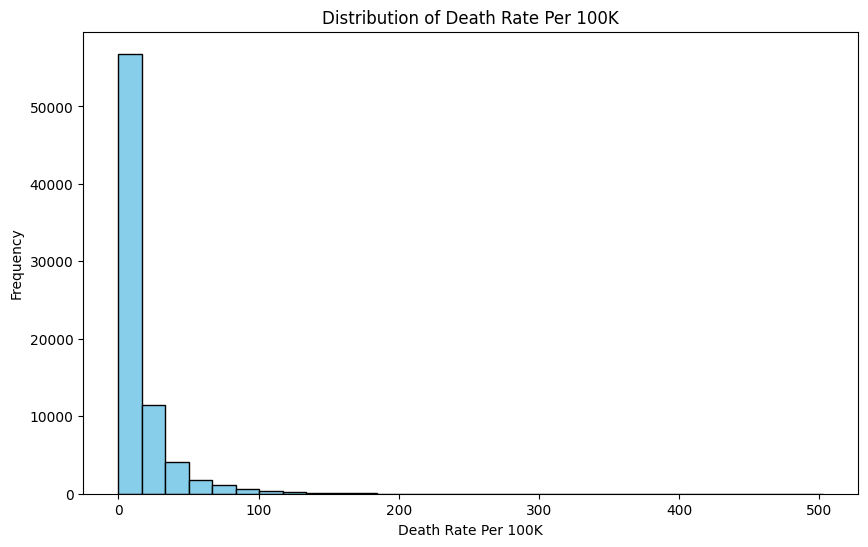

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(train_set['DeathRatePer100K'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Death Rate Per 100K')
plt.ylabel('Frequency')
plt.title('Distribution of Death Rate Per 100K')
plt.show()

In [18]:
#for col in features_cat:
   # bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq= True, show_values= True)

In [19]:

#for col in features_num:
    #bt.plot_grouped_histograms(train_set, cat_col=target, num_col=col, group_size=2)



(14, 2)


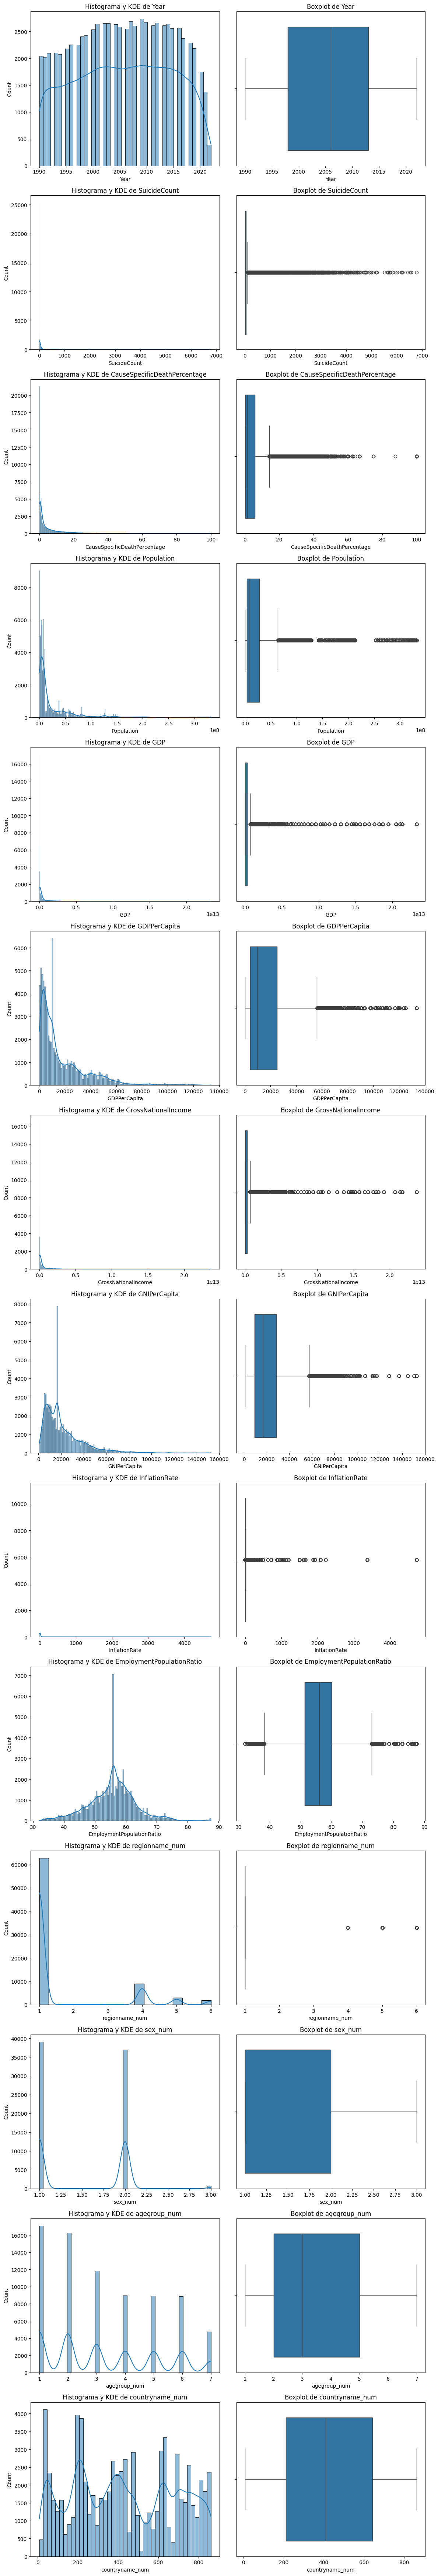

In [30]:
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != target])

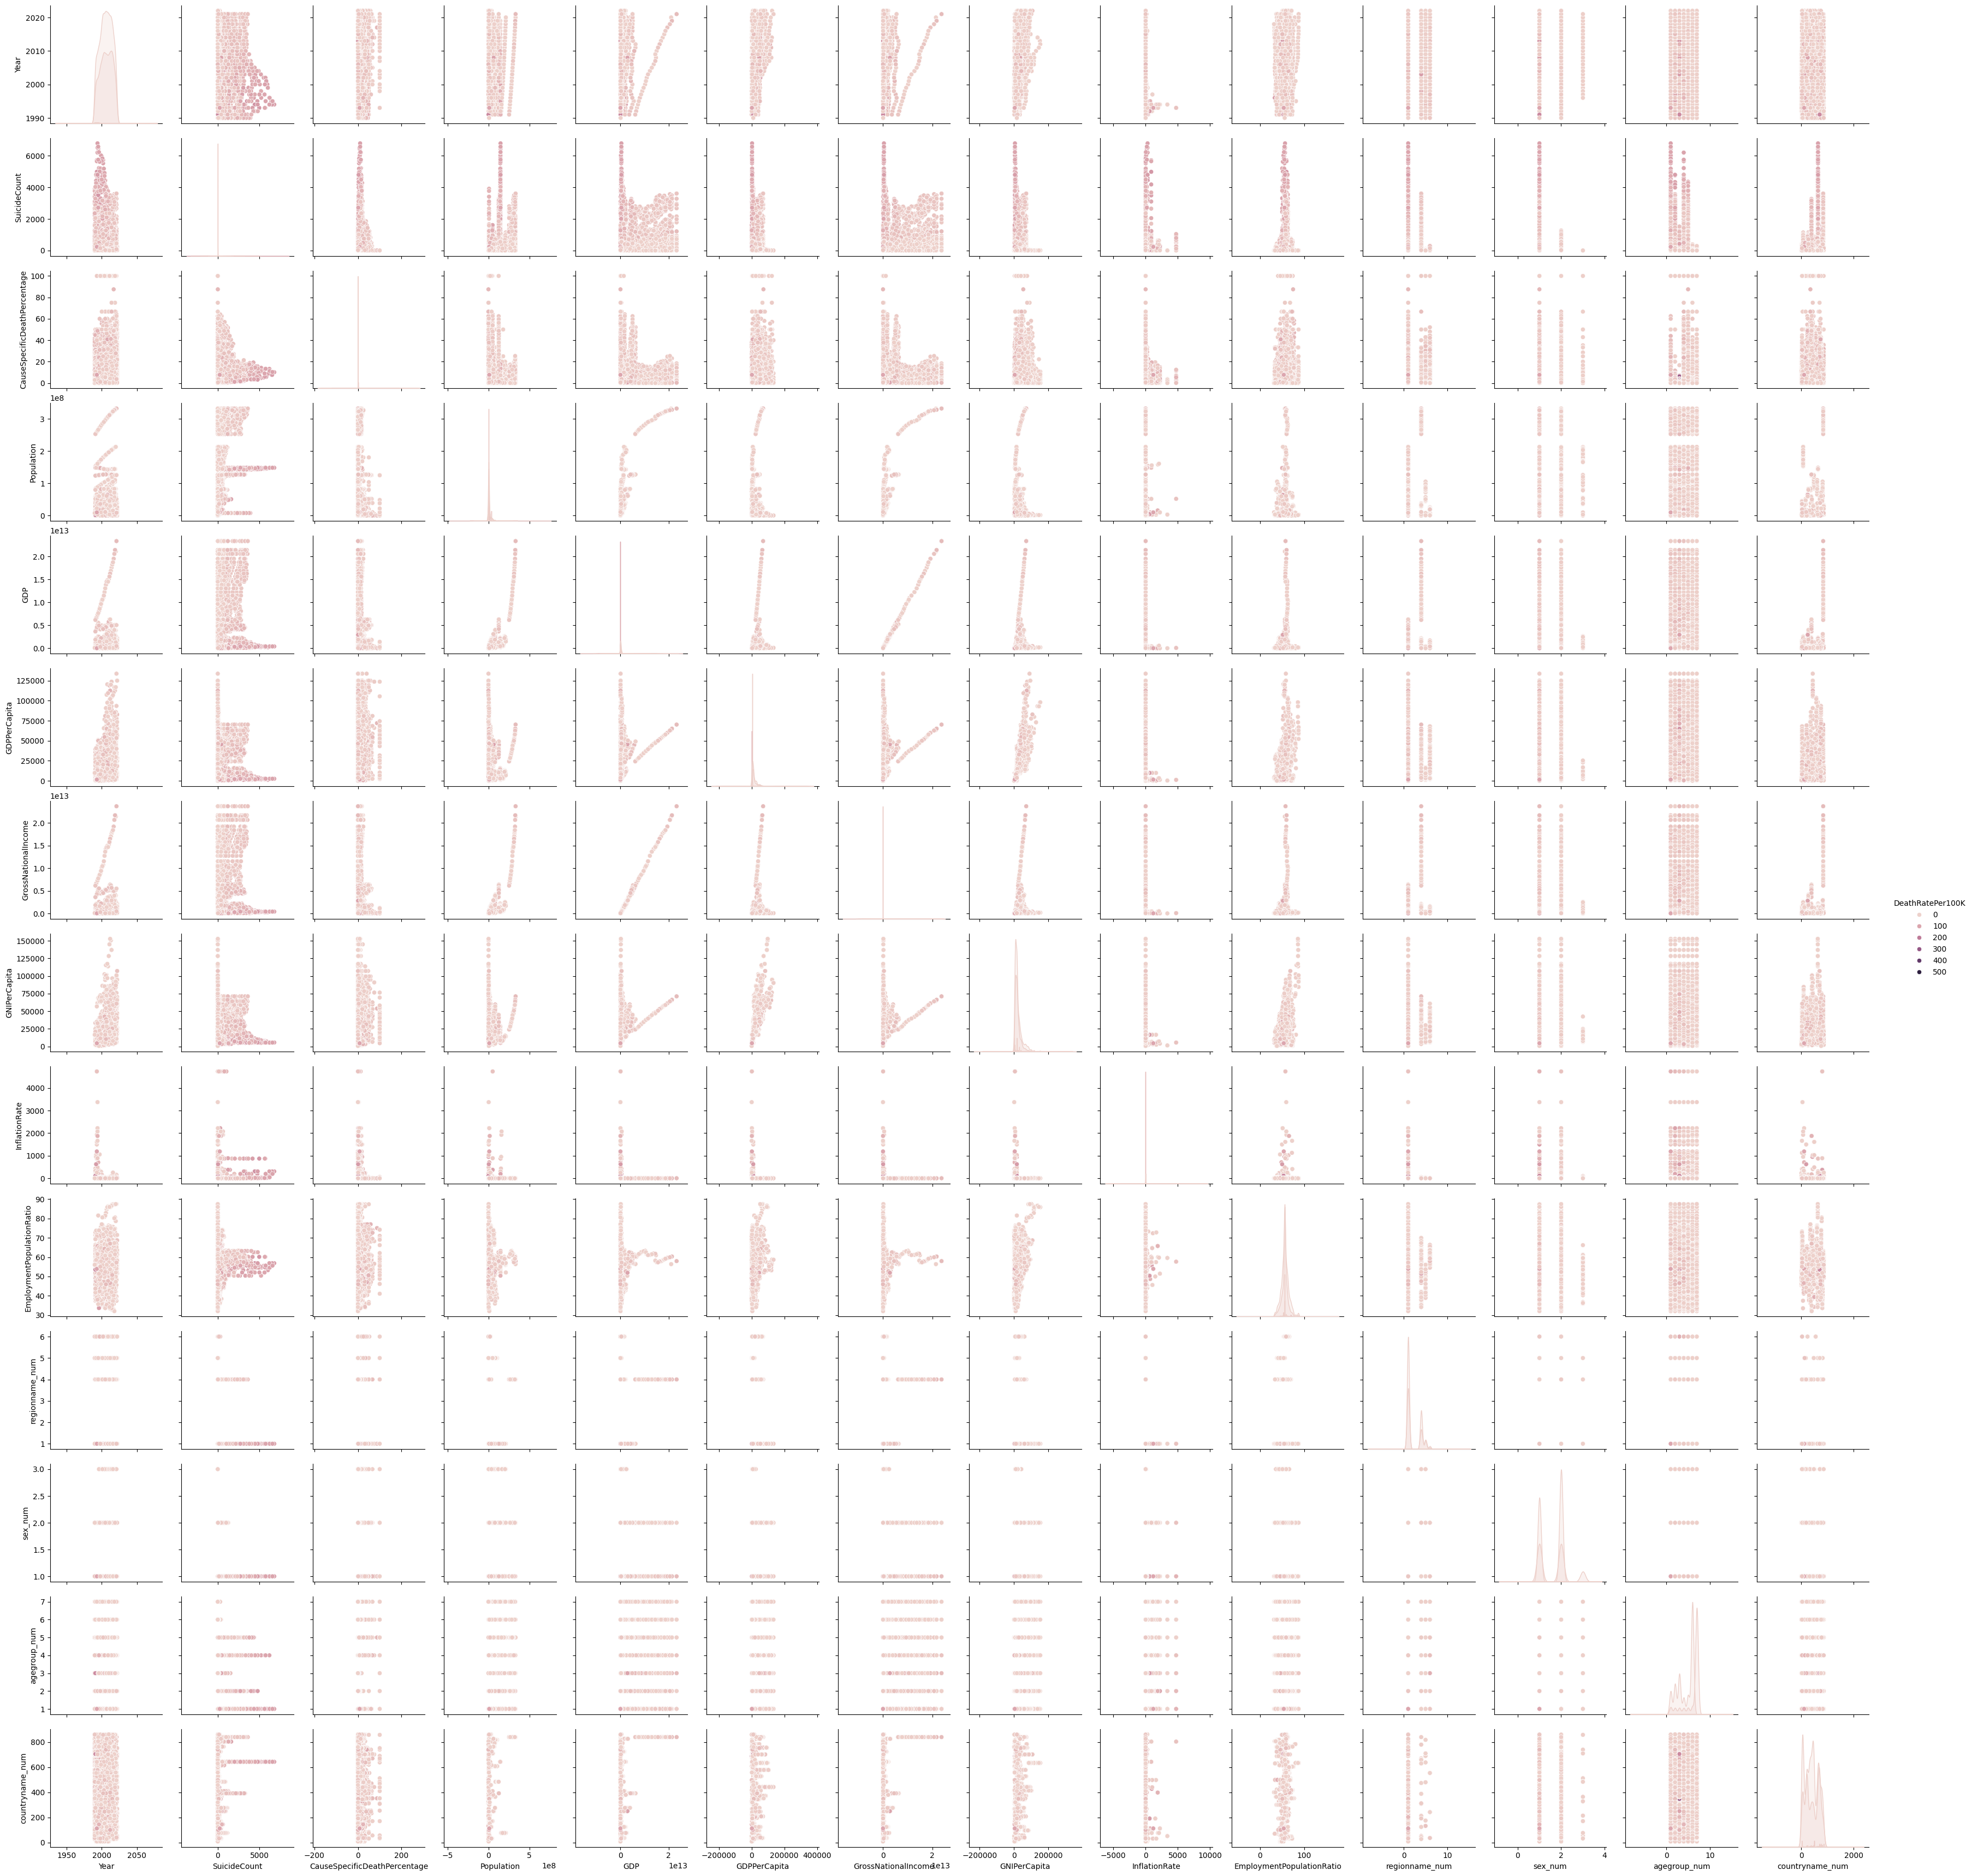

In [31]:
sns.pairplot(train_set[features_num + [target]], hue = target)

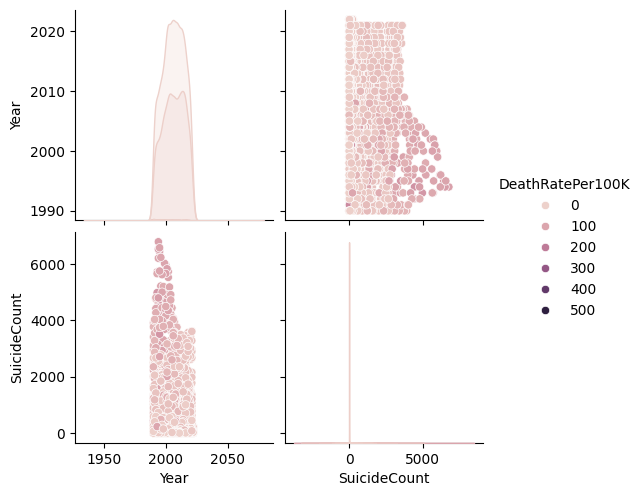

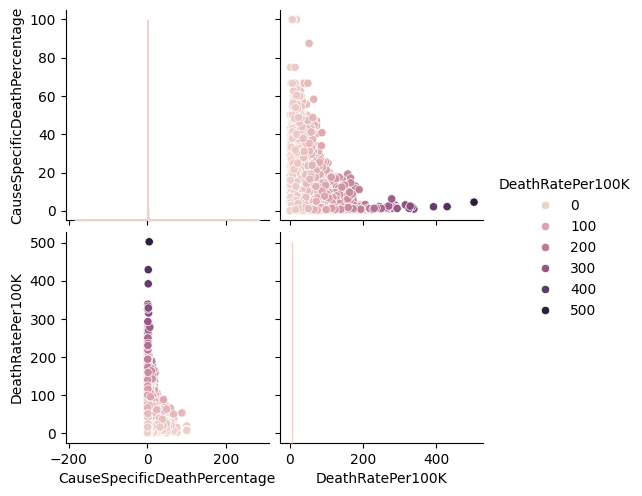

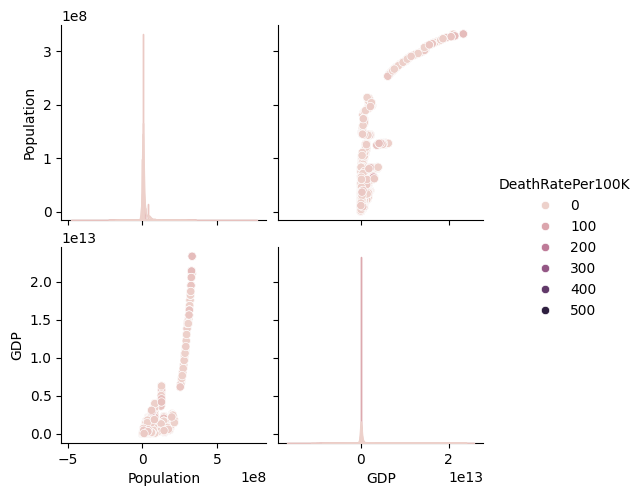

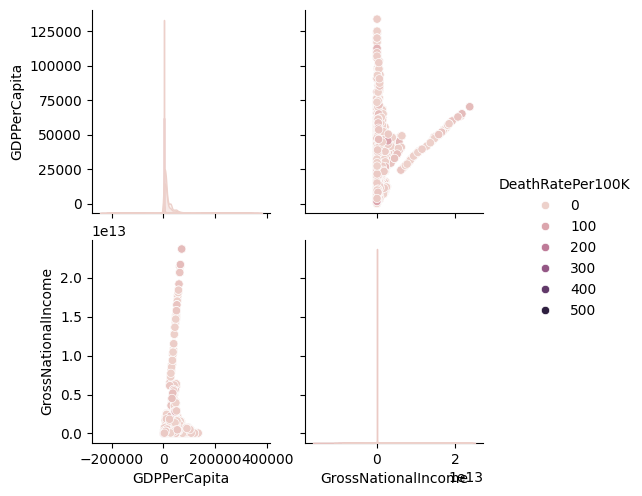

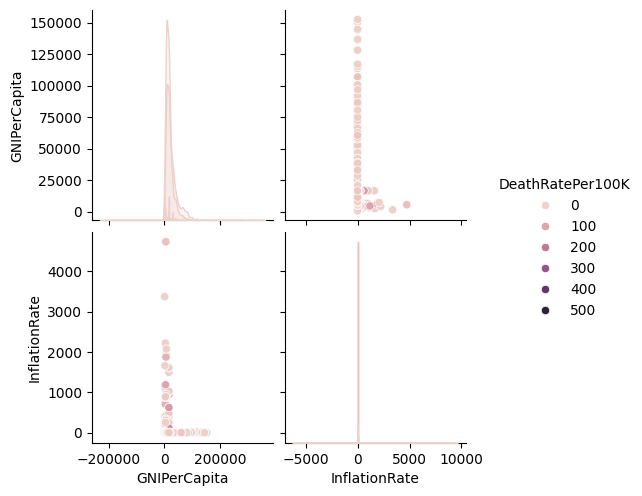

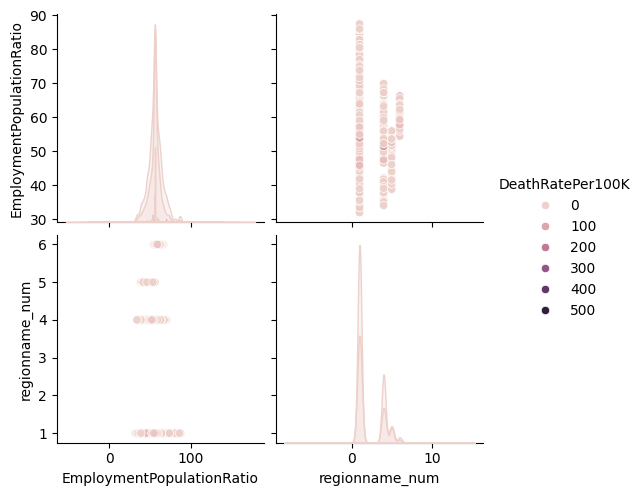

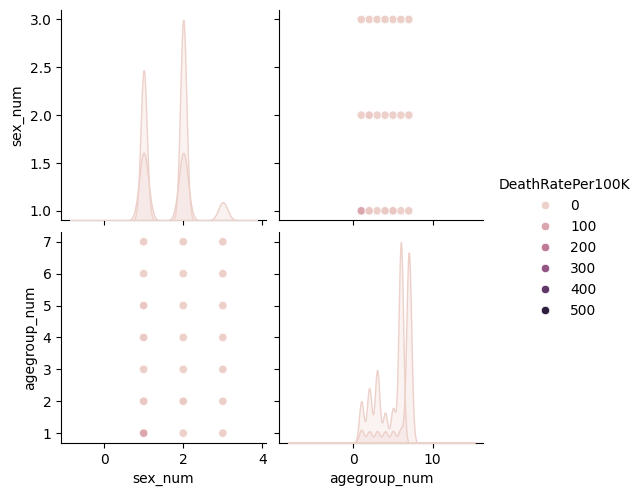

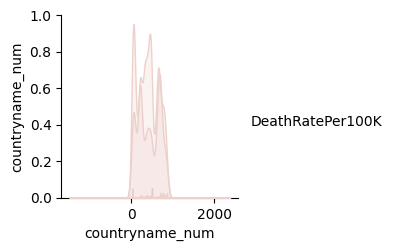

In [34]:
for i in range(0, len(train_set.columns), 2):
    columns_to_plot = train_set.columns[i:i+2].tolist()
    sns.pairplot(train_set, vars=columns_to_plot, hue=target)


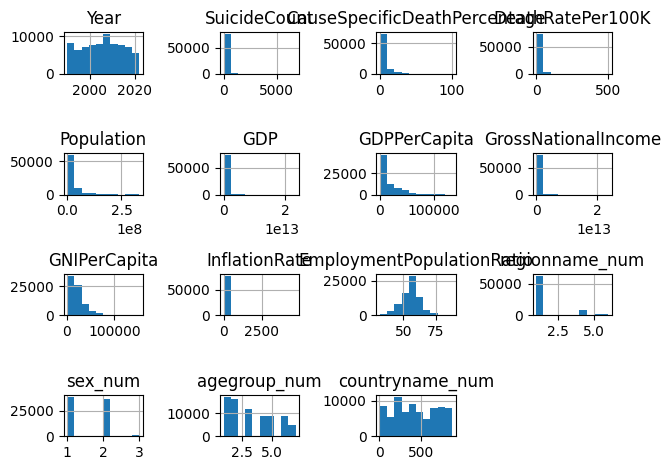

In [29]:
train_set.hist()
plt.tight_layout()

In [ ]:
#hacer clustering con todos los paises por continente y generarlos, para tener menos info
#con el knn

***********************************************************************************************************************************

**************************

In [ ]:
#ver las distribuciones 

In [ ]:
#tocar el gdpper capita

#una vez escalaado hacer el mapa de calor para ver los que tienen más correlación

#utilizar el mae informarme de esos errores


## Start to fit models

In [30]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [31]:
X_train.shape

(76780, 14)

### Scall models

In [35]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

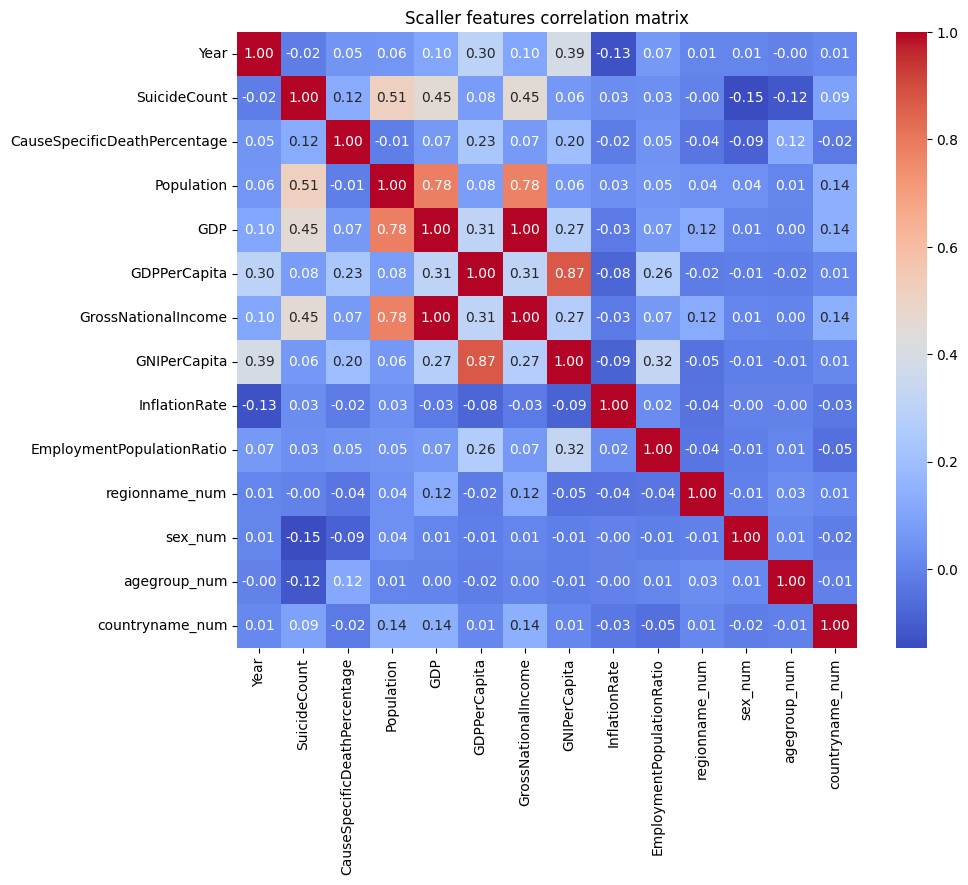

In [39]:
X_train_scaled = scaler.fit_transform(X_train)

# Calculate correlation matrix
corr_matrix = np.corrcoef(X_train_scaled, rowvar=False)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.title("Scaller features correlation matrix")
plt.show()

## Models

### I'm looking for the best model so i see the cross validation and i do a baseline

#### Cross validation

In [50]:

X = X_train  
y = y_train  

models = {
    'Ridge': Ridge(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Linear Regresion': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    }


#Perform cross-validation and calculate MAE, MSE, and R2 for each model.
scores_dict = {}
for name, model in models.items():
    
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae_mean = np.mean(-mae_scores)
    
   
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_mean = np.mean(-mse_scores)
   
    
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    r2_mean = np.mean(r2_scores)
    
    
    # Save data in a dictionari
    scores_dict[name] = {'MAE': mae_mean, 'MSE': mse_mean, 'R2': r2_mean}

# show results
for name, scores in scores_dict.items():
    print(f'{name}: MAE = {scores["MAE"]:.4f}, MSE = {scores["MSE"]:.4f}, R2 = {scores["R2"]:.4f}')
    print("*********************************************************************************************")

c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.32355e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.22496e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.29127e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.38396e-26): result may not be accurate.
  return linalg.solve

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 61424, number of used features: 14
[LightGBM] [Info] Start training from score 14.540270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 61424, number of used features: 14
[LightGBM] [Info] Start training from score 14.445456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2464
[LightGBM] [Info] Number of data points in the train set: 61424, number of used features: 14
[LightGBM] [Info] Start t

### Baseline

In [53]:
#hacer un baseline para modificar todos los parámetros
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

baseline_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    baseline_scores[name] = {"MSE": mse, "R²": r2}

# Paso 5: Evaluar el rendimiento de los modelos
for name, scores in baseline_scores.items():
    print(f"Modelo: {name}")
    print(f"MSE: {scores['MSE']}")
    print(f"R²: {scores['R²']}")
    print("-------------------------")

# Paso 6: Comparar los resultados y elegir el mejor modelo como baseline
best_model = min(baseline_scores, key=lambda x: baseline_scores[x]["MSE"])
print(f"El mejor modelo como baseline es: {best_model}")

c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.28255e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+07, tolerance: 3.572e+03
  model = cd_fast.enet_coordinate_descent(


Modelo: Linear Regression
MSE: 338.32612741238614
R²: 0.2463437877185164
-------------------------
Modelo: Ridge Regression
MSE: 338.3260958234003
R²: 0.24634385808622816
-------------------------
Modelo: Lasso Regression
MSE: 342.9381188078903
R²: 0.23607010299663345
-------------------------
Modelo: Decision Tree Regressor
MSE: 108.19687515796792
R²: 0.7589803432093393
-------------------------
Modelo: Random Forest Regressor
MSE: 57.15233400918021
R²: 0.8726873035143898
-------------------------
El mejor modelo como baseline es: Random Forest Regressor


### LINEAR REGRESSION & DECISION TREE REGRESSOR

In [75]:
lr_clf = LinearRegression()
tree_clf = DecisionTreeRegressor()

In [76]:
lr_clf.fit(X_train, y_train)

LinearRegression()

In [77]:
tree_clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [78]:
lr_pred = lr_clf.predict(X_test)                                                                                                                            

In [79]:
tree_pred = tree_clf.predict(X_test)

In [74]:

mse_lr = mean_squared_error(y_test, lr_pred)
mse_tree = mean_squared_error(y_test, tree_pred)
r2_lr = r2_score(y_test, lr_pred)
r2_tree = r2_score(y_test, tree_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
mae_tree = mean_absolute_error(y_test, tree_pred)

print("MSE LinearRegression:", mse_lr)

print("MSE DecisionTreeRegressor:", mse_tree)
print("****************************************************************")
print("R² LinearRegression:", r2_lr)

print("R² DecisionTreeRegressor:", r2_tree)
print("****************************************************************")
print("MAE LinearRegression:", mae_lr)
print("MAE DecisionTreeRegressor:", mae_tree)

MSE LinearRegression: 338.32612741238614
MSE DecisionTreeRegressor: 108.47081016034655
****************************************************************
R² LinearRegression: 0.2463437877185164
R² DecisionTreeRegressor: 0.7583701248443463
****************************************************************
MAE LinearRegression: 10.91469867924739
MAE DecisionTreeRegressor: 3.2888786685757525


Me quedo con el modelo del Arbol de decisión

In [ ]:
from sklearn.linear_model import Lasso, ridge_regression, Ridge


In [ ]:
#hacer un baseline para modificar todos los parámetros
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

baseline_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    baseline_scores[name] = {"MSE": mse, "R²": r2}

# Paso 5: Evaluar el rendimiento de los modelos
for name, scores in baseline_scores.items():
    print(f"Modelo: {name}")
    print(f"MSE: {scores['MSE']}")
    print(f"R²: {scores['R²']}")
    print("-------------------------")

# Paso 6: Comparar los resultados y elegir el mejor modelo como baseline
best_model = min(baseline_scores, key=lambda x: baseline_scores[x]["MSE"])
print(f"El mejor modelo como baseline es: {best_model}")

c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.28255e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+07, tolerance: 3.572e+03
  model = cd_fast.enet_coordinate_descent(


Modelo: Linear Regression
MSE: 338.32612741238614
R²: 0.2463437877185164
-------------------------
Modelo: Ridge Regression
MSE: 338.3260958234003
R²: 0.24634385808622816
-------------------------
Modelo: Lasso Regression
MSE: 342.9381188078903
R²: 0.23607010299663345
-------------------------
Modelo: Decision Tree Regressor
MSE: 106.48583689639202
R²: 0.7627918567485115
-------------------------
Modelo: Random Forest Regressor
MSE: 57.21189330409523
R²: 0.872554629065168
-------------------------
El mejor modelo como baseline es: Random Forest Regressor


In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula de Regresión Ridge
ridge_params = {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)

# Ajustar la búsqueda en cuadrícula
ridge_grid.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros para Regresión Ridge:", ridge_grid.best_params_)

Mejores hiperparámetros para Regresión Ridge: {'alpha': 10.0, 'solver': 'sparse_cg'}


In [ ]:
ridge_grid.best_estimator_# mirar parámetros y probar con predict_proba 
#si igualamos a una variable, tenemos un modelo con los mejores hiperparámetros

Ridge(alpha=10.0, solver='sparse_cg')

In [61]:
# Ajuste de hiperparámetros para Árbol de Decisión
tree_params = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5)
tree_grid.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros para Árbol de Decisión:", tree_grid.best_params_)

Mejores hiperparámetros para Árbol de Decisión: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [62]:
#sacar gráfica

### Random Forest

In [63]:
rf_reg = RandomForestRegressor()

In [64]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
rf_pred = rf_reg.predict(X_test)   

In [66]:
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)



print("MSE Random Forest Regressor:", mse_rf)
print("****************************************************************")
print("R² Forest Regressor:", r2_rf)
print("****************************************************************")
print("MAE Forest Regressor:", mae_rf)

MSE Random Forest Regressor: 57.19144512490233
****************************************************************
R² Forest Regressor: 0.8726001794853985
****************************************************************
MAE Forest Regressor: 2.4360062373112887


In [80]:
print("MSE LinearRegression:", mse_lr)

print("MSE DecisionTreeRegressor:", mse_tree)
print("MSE Random Forest Regressor:", mse_rf)
print("****************************************************************")
print("R² LinearRegression:", r2_lr)
print("R² DecisionTreeRegressor:", r2_tree)
print("R² Forest Regressor:", r2_rf)
print("****************************************************************")
print("MAE LinearRegression:", mae_lr)
print("MAE DecisionTreeRegressor:", mae_tree)
print("MAE Forest Regressor:", mae_rf)

MSE LinearRegression: 338.32612741238614
MSE DecisionTreeRegressor: 108.47081016034655
MSE Random Forest Regressor: 57.19144512490233
****************************************************************
R² LinearRegression: 0.2463437877185164
R² DecisionTreeRegressor: 0.7583701248443463
R² Forest Regressor: 0.8726001794853985
****************************************************************
MAE LinearRegression: 10.91469867924739
MAE DecisionTreeRegressor: 3.2888786685757525
MAE Forest Regressor: 2.4360062373112887


#### Hiperparámetros

In [68]:
#rf_params = {
    #'n_estimators': [100, 200, 300], #aquí es donde se demora
    #'max_depth': [None, 10, 20],
   # 'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 5, 10],
    #'max_features': ['auto', 'sqrt', 'log2'],
   # 'bootstrap': [True, False]
#}

# Inicializar GridSearchCV para Random Forest
#rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)

# Ajustar la búsqueda en cuadrícula
#rf_grid.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
#print("Mejores hiperparámetros para Random Forest:", rf_grid.best_params_)
#tardaba 450 minutos

In [69]:
rf_params = {
    'n_estimators': [50, 100, 150],  # Reducir el número de estimadores
    'max_depth': [None, 5, 10],  # Limitar la profundidad máxima
    'min_samples_split': [2, 3, 5],  # Reducir el número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],  # Reducir el número mínimo de muestras en cada nodo hoja
    'max_features': ['auto', 'sqrt'],  # Limitar las características a considerar para cada división
    'bootstrap': [True]  # Mantener el ajuste de bootstrap
}
# Inicializar GridSearchCV para Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)

# Ajustar la búsqueda en cuadrícula
rf_grid.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros para Random Forest:", rf_grid.best_params_)

c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\enrik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

Mejores hiperparámetros para Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [83]:
best_rf_model = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150)

# Entrenar el modelo con tus datos
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=150)

In [84]:
best_rf_pred = best_rf_model.predict(X_test)   

In [85]:
mse_rf_best = mean_squared_error(y_test, best_rf_pred)
r2_rf_best = r2_score(y_test, best_rf_pred)
mae_rf_best = mean_absolute_error(y_test, best_rf_pred)


print("MSE Random Forest Regressor:", mse_rf)
print("MSE Random Forest Regressor best params:", mse_rf_best)
print("****************************************************************")
print("R² Forest Regressor:", r2_rf)
print("R² Forest Regressor best params:", r2_rf_best)
print("****************************************************************")
print("MAE Forest Regressor:", mae_rf)
print("MAE Forest Regressor best params:", mae_rf_best)

MSE Random Forest Regressor: 57.19144512490233
MSE Random Forest Regressor best params: 54.962675806909914
****************************************************************
R² Forest Regressor: 0.8726001794853985
R² Forest Regressor best params: 0.8775649921503096
****************************************************************
MAE Forest Regressor: 2.4360062373112887
MAE Forest Regressor best params: 2.678069626053577


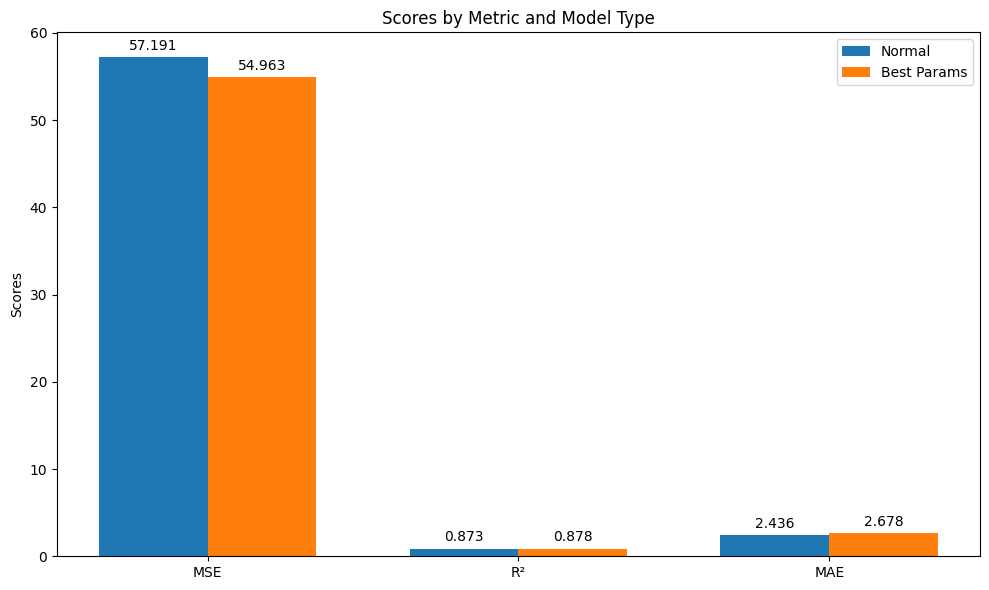

In [111]:


# Defining the results
metrics = ['MSE', 'R²', 'MAE']
normal_results = [round(mse_rf, 3), round(r2_rf, 3), round(mae_rf, 3)]
best_results = [round(mse_rf_best, 3), round(r2_rf_best, 3), round(mae_rf_best, 3)]

# Configuring the plot
x = np.arange(len(metrics))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for normal results
rects1 = ax.bar(x - width/2, normal_results, width, label='Normal')
# Bars for results with best parameters
rects2 = ax.bar(x + width/2, best_results, width, label='Best Params')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Scores by Metric and Model Type')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels to the bars
def autolabel(rects):
    """Attach a text label above each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to the bars
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [112]:
import joblib


joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [87]:
loaded_model = joblib.load('best_rf_model.pkl')